In [1]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab
from scipy.stats import poisson
from sklearn.neighbors import LocalOutlierFactor

In [2]:
#read csv file 
X_train_csv = pd.read_csv("../MLinTheUnknown-Data/X_train.csv", header = None)
# data = pd.read_csv("./real_estate.csv",header =None)
y_train_label_csv = pd.read_csv("../MLinTheUnknown-Data/y_train.csv",header = None)
X_val_csv = pd.read_csv("../MLinTheUnknown-Data/X_val.csv", header = None)
y_val_label_csv =pd.read_csv("../MLinTheUnknown-Data/y_val.csv", header = None)

In [3]:
# abc = predict[predict.iloc[:,0]!=nn.iloc[:,0]]
# abc.head(20)

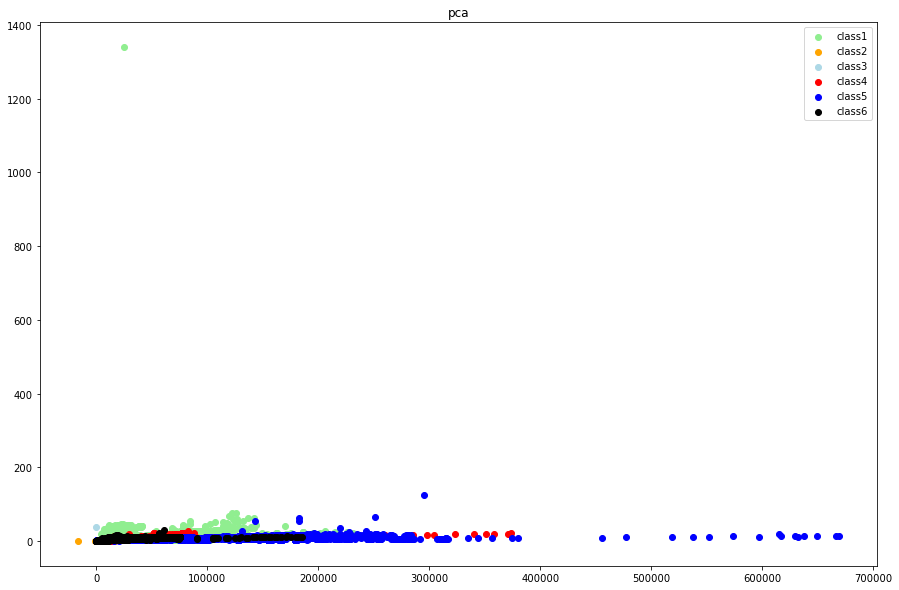

In [4]:
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA, IncrementalPCA


pca = PCA(n_components=2, random_state= 42)

X_train_= pca.fit_transform(X_train_csv)

X_train_ = pd.DataFrame(X_train_csv)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data1 = X_train_[y_train_label_csv[0]==1]
data2 = X_train_[y_train_label_csv[0]==2]
data3 = X_train_[y_train_label_csv[0]==3]
data4 = X_train_[y_train_label_csv[0]==4]
data5 = X_train_[y_train_label_csv[0]==5]
data6 = X_train_[y_train_label_csv[0]==6]

plt.figure(figsize=(15,10))
plt.title("pca")

# ax = plt.axes(projection='3d')
# ax.scatter(data1[0], data1[1], data1[2],c='lightgreen',marker='o',label="class1")
# ax.scatter(data2[0], data2[1],data2[2],c='orange',marker='o', label="class2")
# ax.scatter(data3[0], data3[1], data3[2],c='lightblue',marker='o', label="class3")
# ax.scatter(data4[0], data4[1],data4[2],c='red',marker='o', label="class4")
# ax.scatter(data5[0], data5[1],data5[2],c='blue',marker='o', label="class5")
# ax.scatter(data6[0], data6[1],data6[2],c='Black',marker='o', label="class6")

plt.scatter(data1[0], data1[1],c='lightgreen',marker='o',label="class1")
plt.scatter(data2[0], data2[1],c='orange',marker='o', label="class2")
plt.scatter(data3[0], data3[1],c='lightblue',marker='o', label="class3")
plt.scatter(data4[0], data4[1],c='red',marker='o', label="class4")
plt.scatter(data5[0], data5[1],c='blue',marker='o', label="class5")
plt.scatter(data6[0], data6[1],c='Black',marker='o', label="class6")

plt.legend()
plt.show()

In [7]:
data_DA = pd.DataFrame(X_train_csv)

data_DA['label'] = y_train_label_csv
data_DA

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,10549.4970,4.649028,2.167022,2.752811,3.352847,-1.795881,-2.245240,-2.974630,12602.3785,5.147949,...,-26.270819,38700.2817,10.894055,15.934436,39.024755,44.534611,-9.971828,-15.614072,-21.058869,2.0
1,2255.0098,1.216170,0.783855,2.127426,7.283419,-0.724791,-1.369066,-6.743371,8654.2773,1.516055,...,-5.762565,4930.2559,1.796248,2.230150,4.773774,13.361580,-1.150931,-1.843691,-5.557387,4.0
2,73262.9595,10.763480,20.882685,31.113756,33.561047,-14.626887,-19.464937,-32.201706,72377.0762,9.398184,...,-16.558433,27560.0596,7.502004,8.857011,14.390461,15.428557,-6.604118,-10.169493,-14.197045,4.0
3,44069.7910,5.043857,11.894705,16.865917,29.003995,-8.874675,-21.002964,-38.460729,48995.5728,9.506312,...,-21.740832,26450.5508,8.056586,11.630857,32.422756,40.659982,-5.772124,-9.061040,-16.881837,2.0
4,6860.3404,2.485188,2.068429,3.070743,7.140745,-1.159993,-1.749492,-6.934935,16921.8320,2.999328,...,-24.584155,28181.7056,7.791042,14.848570,46.932606,60.231649,-6.574350,-10.693658,-19.758951,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,45169.9385,10.340504,14.368336,23.764614,29.876741,-9.526939,-14.492018,-34.089898,37635.5376,8.165302,...,-17.497136,21306.2436,5.432045,10.200176,27.995889,34.952143,-5.006856,-7.892173,-14.477287,1.0
8342,1500.6678,1.989343,0.399651,0.759032,3.319534,-0.370875,-0.722925,-3.322006,9579.2744,2.859317,...,-9.029356,9633.2739,2.639321,4.024861,7.124231,10.363737,-2.233758,-3.619148,-7.653114,3.0
8343,119398.0036,34.267652,36.981924,57.312780,61.439555,-27.339333,-37.406058,-70.115525,102710.8335,27.364931,...,-38.955243,49494.4541,11.296415,19.426210,40.766588,45.781237,-13.120850,-21.309395,-31.487861,1.0
8344,456.5752,2.244089,0.105823,0.322010,2.642211,-0.048703,-0.255380,-2.528181,42570.1533,4.664452,...,-6.233574,7912.3716,2.858006,1.826465,3.612572,5.973556,-1.435548,-2.175420,-5.946807,5.0


<AxesSubplot:xlabel='label', ylabel='1'>

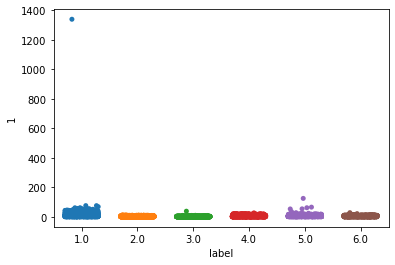

In [8]:

# sns.violinplot(x="labels", y="values", data=data_cut, inner=None)
# for i in range(128):
# sns.boxplot(x=data_DA[i], y="label", data=data_DA, whis=np.inf)


sns.stripplot(x='label', y=data_DA[1], data=data_DA, jitter = 0.3)
# #     plt.savefig(f'./features_label_analysis_stripplot/{m}__.png', dpi=300)
#     plt.show()


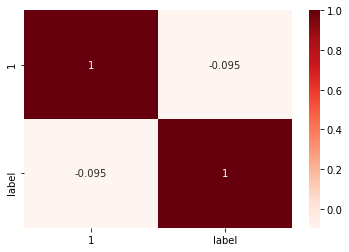

In [9]:


corr_01 = data_DA[[1,'label']].corr()


sns.heatmap(corr_01, annot = True, cmap = 'Reds')
plt.show()

<AxesSubplot:title={'center':'feature1'}, ylabel='0'>

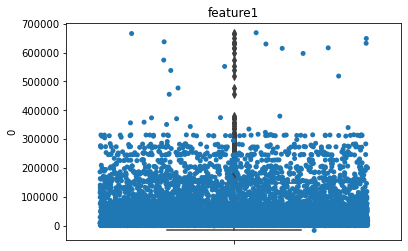

In [10]:
#关于箱型图有多种方法绘制
#法一 pandas
# df.plot.box()
# df['PassengerId'].plot.box()
#法二  seaborn
plt.title("feature1")

sns.boxplot(y=X_train_csv[0])

sns.stripplot(y=X_train_csv[0],jitter=0.4)

# sns.violinplot(x=X_train_csv[0],jitter=0.3)

In [11]:
# X_train_csv.nunique()
X_train_csv.nunique()

0        8344
1        8337
2        8345
3        8345
4        8342
         ... 
124      8343
125      8344
126      8344
127      8346
label       6
Length: 129, dtype: int64

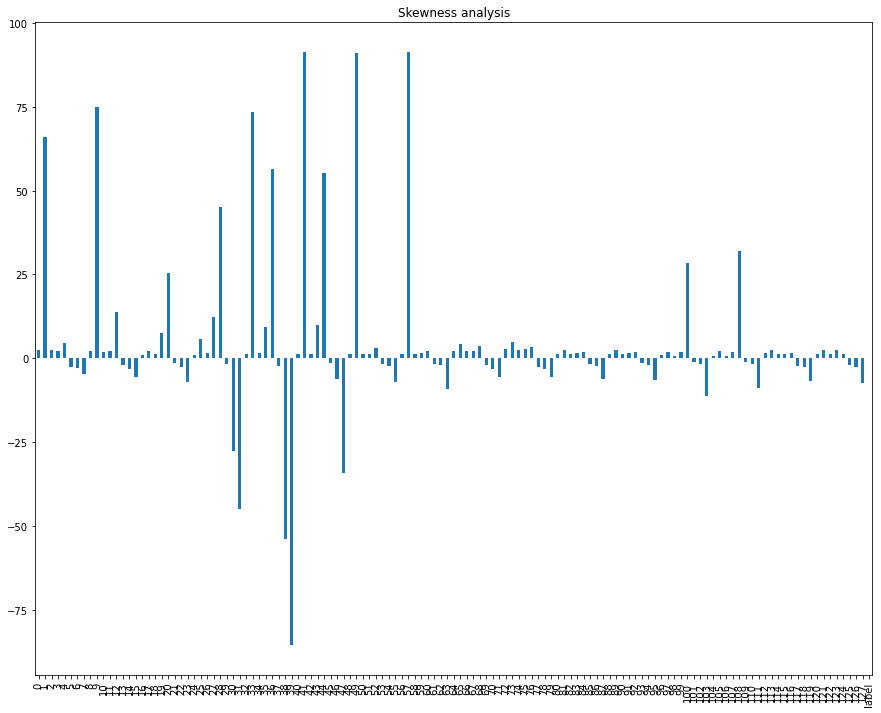

In [26]:
# 偏度

# X_train_csv.skew()  # 每一列的偏度
plt.figure(figsize=(15,12))
plt.title("Skewness analysis")
X_train_csv.skew().plot.bar()
plt.savefig("偏度分析.png")
plt.show()
# 偏度是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性，
# 偏度的绝对值数值越大表示其分布形态的偏斜程度越大

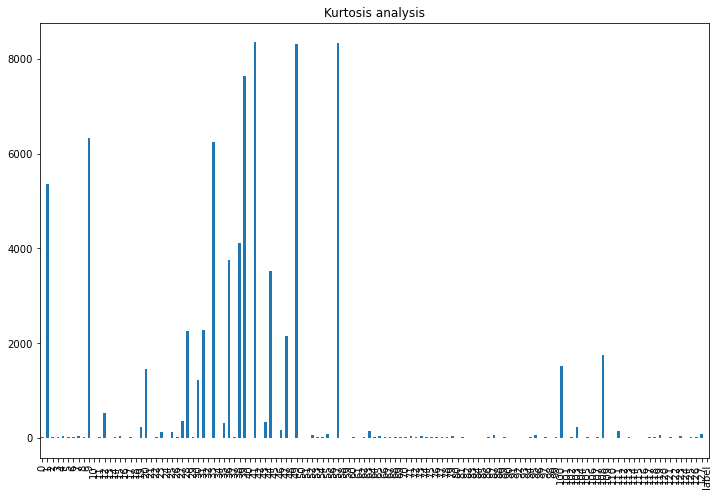

In [22]:
#  峰度
# X_train_csv.kurt() # 每一列的峰度
plt.figure(figsize=(12,8))
plt.title("Kurtosis analysis")
X_train_csv.kurt().plot.bar()
plt.savefig("峰度分析.png")
plt.show()
# 峰度是描述总体中所有取值分布形态陡缓程度的统计量，

# 绝对值数值越大表示其分布形态的陡缓程度与正态分布的差异程度越大

<AxesSubplot:>

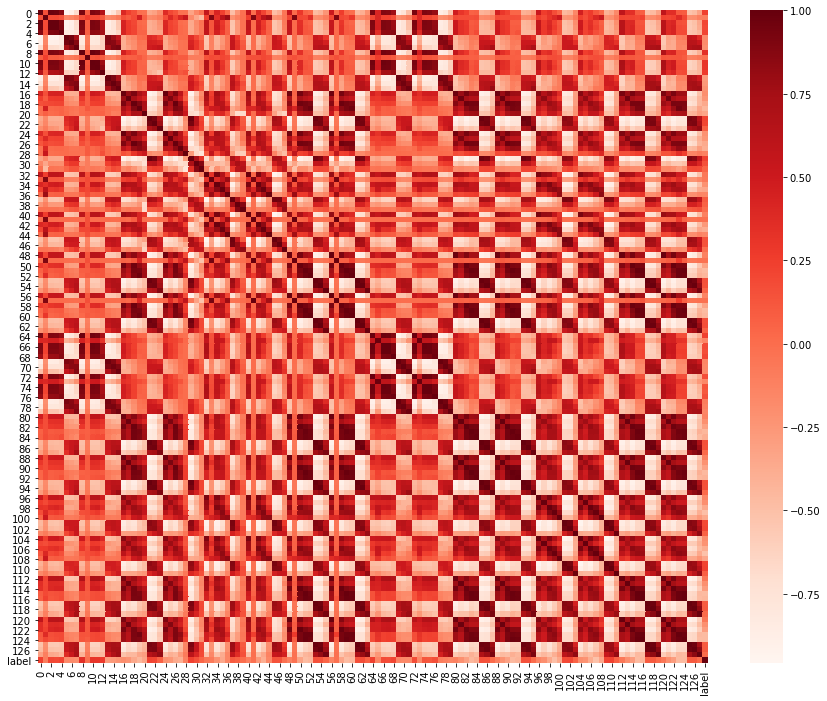

In [16]:
# #相关系数矩阵. 及其可视化
X_train_csv.corr()    
plt.figure(figsize=(15,12))
sns.heatmap(X_train_csv.corr(), cmap='Reds')  

In [13]:
import matplotlib.pyplot as plt
classifier = ['KNN','RandomForest','ExtraTree','xgboost','light-gbm','GradientBoost','Bagging','logisticRegression','Adaboost','SVM']
values=[0.9946066, 0.995317,   0.995679598,   0.99460394, 0.99280517, 0.98991698,  0.99492725, 0.988848702,  0.99316876638, 0.98274546024]